# 회귀분석 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 생성
np.random.seed(42)
X1 = 5 * np.random.rand(100, 1)   # 광고비
X2 = 3 * np.random.rand(100, 1)   # 판촉비
y = 2 + 1.5 * X1 + 0.8 * X2 + np.random.randn(100, 1)  # 판매수량

# 단순 회귀용 (광고비만 사용)
X_simple = X1

# 다중 회귀용 (광고비 + 판촉비)
X_multi = np.hstack([X1, X2])

# 2. 데이터 분할
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.3, random_state=0)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.3, random_state=0)

# 3. 모델 학습
lin_reg_s = LinearRegression().fit(X_train_s, y_train_s)   # 단순 회귀
lin_reg_m = LinearRegression().fit(X_train_m, y_train_m)   # 다중 회귀

# 4. 성능 평가
print("단순 회귀")
print("Train R²:", lin_reg_s.score(X_train_s, y_train_s))
print("Test R²:", lin_reg_s.score(X_test_s, y_test_s))
print("\n다중 회귀")
print("Train R²:", lin_reg_m.score(X_train_m, y_train_m))
print("Test R²:", lin_reg_m.score(X_test_m, y_test_m))


단순 회귀
Train R²: 0.7043948359679164
Test R²: 0.7035794263926065

다중 회귀
Train R²: 0.8443200917094443
Test R²: 0.8302568569357736


Q1. 출력된 R² 값을 보고, 어떤 모델이 데이터를 더 잘 설명하는지 판단하고 그 이유를 쓰시오.

A. 결정계수가 큰 다중 회귀 모델이 데이터를 잘 설명함.

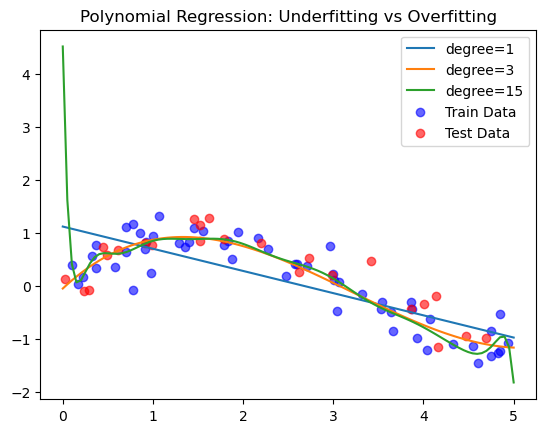

R² 결과:
degree=1 → Train R² = 0.6717, Test R² = 0.3171
degree=3 → Train R² = 0.8688, Test R² = 0.8064
degree=15 → Train R² = 0.8826, Test R² = 0.2200


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. 데이터 생성 (비선형 데이터)
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.3 * np.random.randn(80)

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 모델 정의 (저차 다항 vs 고차 다항)
degrees = [1, 3, 15]  # 1차, 3차, 15차
results = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)

    results[d] = {
        "train_r2": model.score(X_train_poly, y_train),
        "test_r2": model.score(X_test_poly, y_test)
    }
    # 시각화
    X_range = np.linspace(0, 5, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    plt.plot(X_range, model.predict(X_range_poly), label=f"degree={d}")

# 원래 데이터
plt.scatter(X_train, y_train, color="blue", alpha=0.6, label="Train Data")
plt.scatter(X_test, y_test, color="red", alpha=0.6, label="Test Data")
plt.title("Polynomial Regression: Underfitting vs Overfitting")
plt.legend()
plt.show()

print("R² 결과:")
for d, scores in results.items():
    print(f"degree={d} → Train R² = {scores['train_r2']:.4f}, Test R² = {scores['test_r2']:.4f}")


Q2. 위 실험에서 어떤 모델이 가장 적절한지 이유와 함께 설명하시오.

A. degree가 3인 모델이 가정 적절하다. degree가 1일 때는 결정계수가 낮고, degree가 15일때는 테스트셋의 결정계수가 낮아 과대적합이다.

In [7]:
# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#1. 데이터 생성
np.random.seed(10)
X = np.sort(5 * np.random.rand(30, 1), axis=0)
y = np.sin(X).ravel() + 0.5 * np.random.randn(30)

#2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#3. 다항식 변환
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#4. 모델 학습 및 평가
models = {
    "Polynomial Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    print(f"{name}: Train R² = {model.score(X_train_poly, y_train):.4f}, Test R² = {model.score(X_test_poly, y_test):.4f}")


Polynomial Regression: Train R² = 0.9393, Test R² = 0.3196
Ridge Regression: Train R² = 0.8947, Test R² = 0.6201
Lasso Regression: Train R² = 0.7491, Test R² = 0.5557


C:\Users\jun05\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+00, tolerance: 1.027e-03
  model = cd_fast.enet_coordinate_descent(


Q3. 위 결과에서 Polynomial Regression 모델이 보이는 현상을 무엇이라고 하며, 그 이유를 설명하시오.

A. 과대적합. 학습 데이터의 결정계수가 높고 테스트 데이터의 결정계수가 낮음.

#분류(classification) 실습

In [5]:
#라이브러리 불러오기
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#분류 모델 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
#1. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target #꽃의 특성들(X)을 이용해서 꽃의 품종(y)을 결정

iris_df = pd.DataFrame(X, columns = iris.feature_names)
iris_df['species']=y
print(iris_df.head())
print("\n")

#2. 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f"훈련 데이터 개수 : {X_train.shape}, 테스트 데이터 개수 : {X_test.shape}\n")

#3. 사용할 모델 정의
models = {
    "로지스틱 회귀" : LogisticRegression(max_iter=1000),
    "K-최근접 이웃(KNN)" : KNeighborsClassifier(n_neighbors=5),
    "의사결정나무" : DecisionTreeClassifier(random_state=123),
    "랜덤 포레스트" : RandomForestClassifier(n_estimators=100, random_state=123)
}

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


훈련 데이터 개수 : (120, 4), 테스트 데이터 개수 : (30, 4)



In [11]:
#4.모델 학습 및 성능 평가
results = {}
for name, model in models.items():

    model.fit(X_train, y_train) #모델 학습

    y_pred = model.predict(X_test) #예측

    #성능 평가
    report = classification_report(y_test, y_pred, target_names=iris.target_names)
    print(f" 모델: {name}")
    print(report)

 모델: 로지스틱 회귀
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

 모델: K-최근접 이웃(KNN)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.83      0.91         6
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

 모델: 의사결정나무
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.

Q1. 정밀도(precision), 재현율(recall)이 낮다는 것은 각각 무엇을 의미하는 것인지 작성하시오.

A : 정밀도가 낮은건 FP의 값이 높다는 것, 즉 거짓을 참으로 잘못 예측하는 경우가 많음. 재현율이 낮은건 FN의 값이 높다는 것, 즉 참을 거짓으로 예측하는 경우가 많음.

Q2. 위 코드의 결과를 보고 의사결정나무 모델에서 예측을 가장 어려워하는 품종이 무엇이고, 그렇게 생각한 이유를 적으시오.

A : versicolor 품종 예측을 가장 어려워 함. 다른 품종보다 precision과 f1-score가 낮음.